# 웹페이지 스크레이핑

## 정적 웹페이지 파싱

### 1) 웹페이지 가져오기
- urllib.request.urlopen(url)


In [137]:
import urllib.request
hollys_url = "https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store="

html = urllib.request.urlopen(hollys_url)

print(html)

### 2)  beautifulsoup 설치



In [2]:
!pip install beautifulsoup4

### 3)  파싱

- 연습용 html 로 실행
- BeautifulSoup() : 파싱
- soup : 파싱된 객체
- prettify() : 파싱된 객체 구조를 예쁘게 보여줌

In [4]:
from bs4 import BeautifulSoup 

html= '''
<h1 id="title">숭실대학교</h1>
<div class="top">
<ul class="menu">  <li> <a href=http://www.ssu.ac.kr/member/login.html class="login">로그인 </a></li></ul>
<ul class="dept"> 
    <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
    <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
    <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
</ul>
</div>
'''

soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())  # 예쁘게

<h1 id="title">
 숭실대학교
</h1>
<div class="top">
 <ul class="menu">
  <li>
   <a class="login" href="http://www.ssu.ac.kr/member/login.html">
    로그인
   </a>
  </li>
 </ul>
 <ul class="dept">
  <li>
   <a href="http://www.ssu.ac.kr/sw/">
    소프트웨어학부
   </a>
  </li>
  <li>
   <a href="http://www.ssu.ac.kr/ai/">
    AI융합학부
   </a>
  </li>
  <li>
   <a href="http://www.ssu.ac.kr/stat/">
    정보통계학부
   </a>
  </li>
 </ul>
</div>



### 4) 파싱된 객체 보기

- 파싱 : 텍스트 -> 객체 , 브라우저가 하는 일

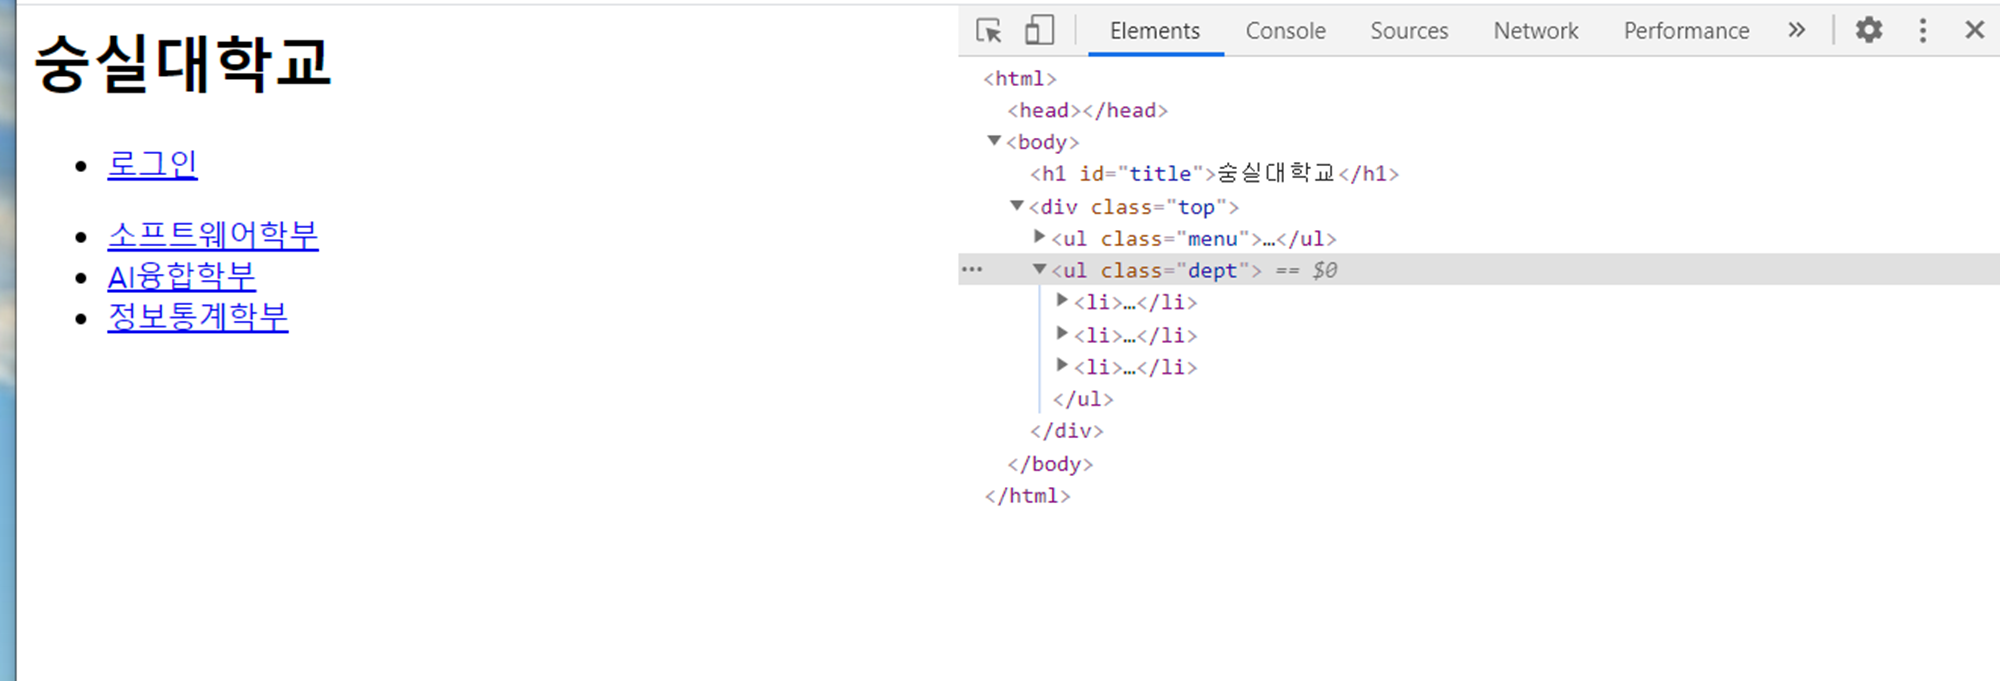

- soup 객체 : 파이썬에서 html 태그에 접근


In [5]:
soup.h1

<h1 id="title">숭실대학교</h1>

In [6]:
soup.ul  # 첫번째 아이템만 보여줌

<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>

In [7]:
soup.li

<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>

- 아이템이 여러개인 경우 : find_all () => list로 return 함

In [8]:
soup.find_all("ul")

[<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>,
 <ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>]

In [13]:
soup.find_all("li")[2].string

'AI융합학부'

### 5) 검색

- attrs : tag의 속성 이름과 값을 dict 로 구성

In [18]:
tag_a = soup.a  # 첫번째
tag_a

<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>

In [19]:
tag_a.attrs 

{'href': 'http://www.ssu.ac.kr/member/login.html', 'class': ['login']}

In [20]:
tag_a['href']  # = tag_a.attrs['href']

'http://www.ssu.ac.kr/member/login.html'

- find(), find_all()  : 태그, 속성, string, re, list 등등 으로찾기

In [21]:
soup.find_all('li')

[<li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [23]:
# 속성
soup.find_all(id = "title")

[<h1 id="title">숭실대학교</h1>]

In [24]:
# class 속성은 아래 처럼 표기  class="login"는 error 남
soup.find_all(attrs={'class':'login'})

[<a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a>]

In [25]:
# list
soup.find_all(['ul','li'])

[<ul class="menu"> <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li></ul>,
 <li> <a class="login" href="http://www.ssu.ac.kr/member/login.html">로그인 </a></li>,
 <ul class="dept">
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>
 </ul>,
 <li><a href="http://www.ssu.ac.kr/sw/">소프트웨어학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/ai/">AI융합학부</a></li>,
 <li><a href="http://www.ssu.ac.kr/stat/">정보통계학부</a></li>]

In [26]:
# text 찾기 : string =   ; exact matching
soup.find(string = "소프트웨어학부")

'소프트웨어학부'

In [30]:
# 부분 matching re

import re
soup.find_all(string = re.compile("학부"))

['소프트웨어학부', 'AI융합학부', '정보통계학부']

* .string : markup 제외 텍스트만 가져오기 

In [29]:
title = soup.find(id = "title")
title.string

'숭실대학교'

In [31]:
all = soup.find_all("a")
for item in all:
    print(item.string)

로그인 
소프트웨어학부
AI융합학부
정보통계학부


- 기타 참조 문서

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## 크롤링 해서 데이터 수집

- 크롤링 허용 정책 확인  : 사이트주소/robots.txt   
    예) http://www.hanbit.co.kr/robots.txt
   - 없으면 허용
   
- 할리스 커피 : 매장 정보 크롤링
    - https://www.hollys.co.kr/store/korea/korStore2.do
    - html 소스 보기 : CTRL+U 또는 [F12]
    
- 소스 위치 및 검색 구조 파악
    - 소스위치 "매장명"으로 검색
    - 페이지 넘김
    - 검색키워드 넣어보기

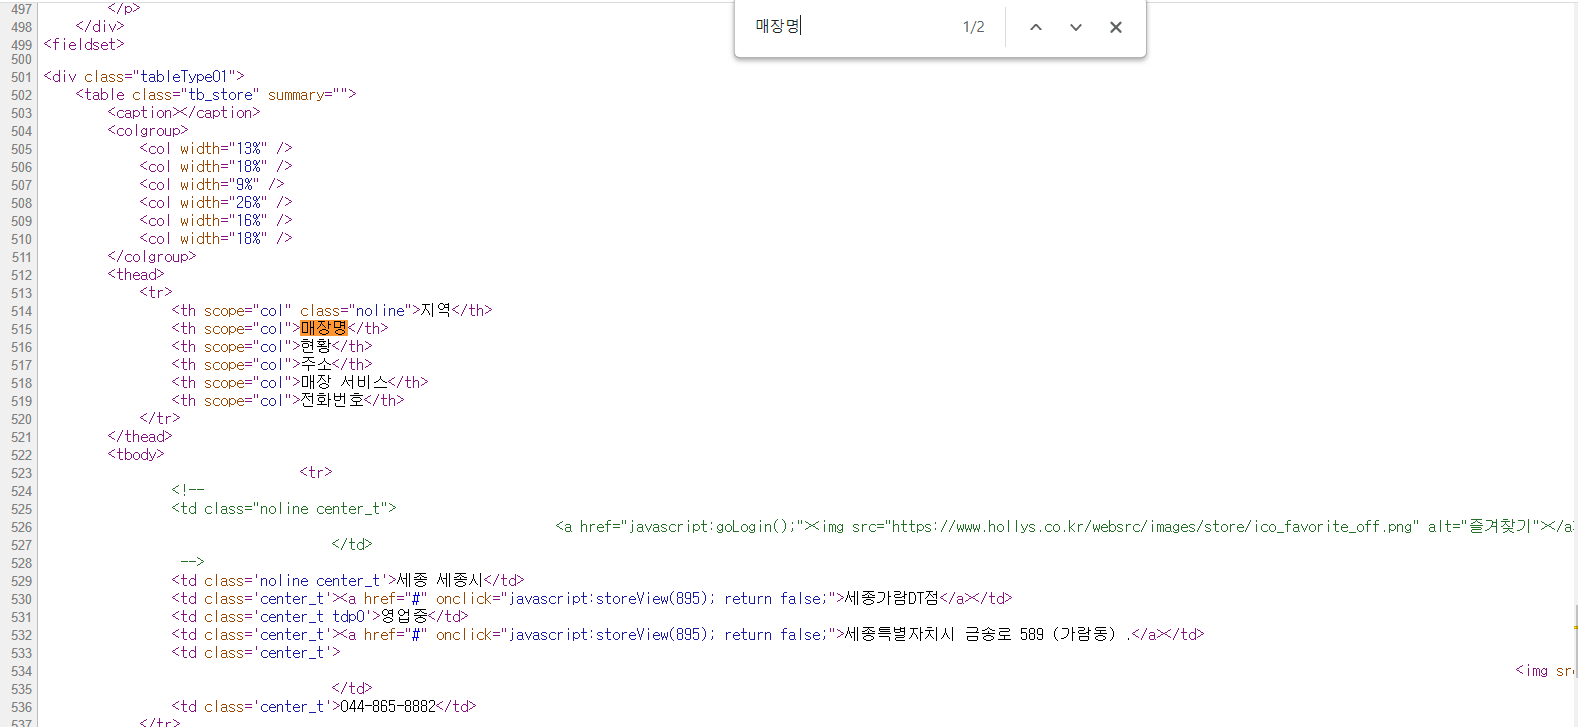

### 1) html 가져오기

In [36]:
import urllib.request
hollys_url="https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store="

html= urllib.request.urlopen(hollys_url)
print(html)

### 2) 파싱

In [37]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>할리스</title>
<meta charset="utf-8"/>
<meta content="HOLLYS" name="Subject">
<meta content="HOLLYS" name="Title"/>
<meta content="HOLLYS,HOLLYS,할리스,할리스,커피" name="Keywords"/>
<meta content="할리스는 1998년 국내 첫 에스프레소 커피전문점을 개점한 순수 국내브랜드로서 당당하게 시장 선점이라는 확고한 위치를 확보하고 국내 에스프레소 커피시장을 주도해 나가고 있습니다." name="Description"/>
<meta content="HOLLYS F&amp;B" name="Author"/>
<meta content="HOLLYS F&amp;B" name="Publisher"/>
<meta content="COFFEE,커피,음료,푸드" name="Classification"/>
<meta content="Korea" name="Location"/>
<meta content="2015.04.01" name="Author-Date"/>
<meta content="2023.03.22" name="Date"/>
<meta content="HOLLYS, HOLLYS F&amp;B" name="Distribution"/>
<meta content="HOLLYS" name="Copyright"/>
<meta content="website" property="og:type"/>
<meta content="할리스" property="og:title"/>
<meta content="HOLLYS" property="og:description"/>
<meta content="https://www.hollys.co.kr/" property="og:url">
<link hr

### 3) 찾기 

In [38]:
tbody = soup.find("tbody")
tbody.prettify()

'<tbody>\n <tr>\n  <!--\r\n\t\t\t\t<td class="noline center_t">\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>\r\n\t\t\t\t\t\t\t\t\t</td>\r\n\t\t\t\t -->\n  <td class="noline center_t">\n   서울 마포구\n  </td>\n  <td class="center_t">\n   <a href="#" onclick="javascript:storeView(1056); return false;">\n    신촌역점\n   </a>\n  </td>\n  <td class="center_t tdp0">\n   영업중\n  </td>\n  <td class="center_t">\n   <a href="#" onclick="javascript:storeView(1056); return false;">\n    서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층\n   </a>\n  </td>\n  <td class="center_t">\n   <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>\n  </td>\n  <td class="center_t">\n   02-325-7588\n  </td>\n </tr>\n <tr>\n  <!--\r\n\t\t\t\t<td class="noline center_t">\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr

### 4)  분해하기

In [39]:
tr = tbody.find('tr')
tr

<tr>
<!--
				<td class="noline center_t">
																<a href="javascript:goLogin();"><img src="https://www.hollys.co.kr/websrc/images/store/ico_favorite_off.png" alt="즐겨찾기"></a>
									</td>
				 -->
<td class="noline center_t">서울 마포구</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">신촌역점</a></td>
<td class="center_t tdp0">영업중</td>
<td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층</a></td>
<td class="center_t">
<img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
</td>
<td class="center_t">02-325-7588</td>
</tr>

In [40]:
tds = tr.find_all('td')
tds

[<td class="noline center_t">서울 마포구</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">신촌역점</a></td>,
 <td class="center_t tdp0">영업중</td>,
 <td class="center_t"><a href="#" onclick="javascript:storeView(1056); return false;">서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층</a></td>,
 <td class="center_t">
 <img alt="주차" src="https://www.hollys.co.kr/websrc/images/store/img_store_s08.png" style="margin-right:1px"/>
 </td>,
 <td class="center_t">02-325-7588</td>]

In [41]:
for td in tds:
    print (td.string)

서울 마포구
신촌역점
영업중
서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층
None
02-325-7588


### 5)  pandas 데이터프레임 만들기

- list로  만들기 

In [42]:
result = []
trs = tbody.find_all('tr')
for tr in trs:
    tds = tr.find_all('td')
    name = tds[1].string
    sido = tds[0].string
    addr = tds[3].string
    phone = tds[5].string
    result.append([name,sido,addr,phone])

result

[['신촌역점', '서울 마포구', '서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층', '02-325-7588'],
 ['BMC점', '경기 고양시 일산동구', '경기도 고양시 일산동구 동국로 32 (식사동) 산학협력관 1층', '031-961-5692'],
 ['청주율량현대점', '충북 청주시 청원구', '충청북도 청주시 청원구 율봉로 150 .', '043-241-0005'],
 ['연세대학교원주장례식장점', '강원 원주시', '강원도 원주시 일산로 20 장례식장 1층', '033-735-3335'],
 ['원주세브란스기독병원점',
  '강원 원주시',
  '강원동 원주시 일산로 20 원주세브란스기독병원 외래센터 1층',
  '033-735-3339'],
 ['순천향대학교 천안병원 외래점',
  '충남 천안시 동남구',
  '충청남도 천안시 동남구 순천향6길 31 (봉명동, 순천향대학교천안병원) 외래센터 2층',
  '.'],
 ['순천향대학교 천안병원 본관점',
  '충남 천안시 동남구',
  '충청남도 천안시 동남구 순천향6길 31 (봉명동, 순천향대학교천안병원) 본관 1층',
  '.'],
 ['(천)이인휴게소점', '충남 공주시', '충청남도 공주시 이인면 논산천안고속도로 32 (이인상행휴게소) .', '.'],
 ['(논)탄천휴게소2호점', '충남 공주시', '충청남도 공주시 탄천면 논산천안고속도로 27 (탄천하행휴게소) .', '.'],
 ['의정부역점',
  '경기 의정부시',
  '경기도 의정부시 신흥로232번길 5-31,(의정부동, 아이비타워) 1층',
  '031-876-7006']]

### 6) 데이터 프레임 만들기

In [45]:
import pandas as pd
hollys_df= pd.DataFrame (result, columns=("store","sido","address", "phone" ) )
hollys_df.head()

,store,sido,address,phone
0,신촌역점,서울 마포구,"서울특별시 마포구 신촌로 88 (노고산동, 태영빌딩) 2층",02-325-7588
1,BMC점,경기 고양시 일산동구,경기도 고양시 일산동구 동국로 32 (식사동) 산학협력관 1층,031-961-5692
2,청주율량현대점,충북 청주시 청원구,충청북도 청주시 청원구 율봉로 150 .,043-241-0005
3,연세대학교원주장례식장점,강원 원주시,강원도 원주시 일산로 20 장례식장 1층,033-735-3335
4,원주세브란스기독병원점,강원 원주시,강원동 원주시 일산로 20 원주세브란스기독병원 외래센터 1층,033-735-3339


### 7) 저장하기 :  csv 로 저장 

- df.to_csv("파일이름", encoding="cp949", mode="w", index=True) 


In [46]:
hollys_df.to_csv("hollys_df", encoding="cp949", mode="w", index=True)

### 1.1) 여러 페이지 가져오기

In [47]:
for page in range(1,54):
    hollys_url = "https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store="%page
    print(hollys_url)

https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=10&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=11&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=12&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore2.do

## 전체 프로그램

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

def hollys_store(result):
    for page in range(1,54):
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore.do?pageNo=%d&sido=&gugun=&store=' %page
        print(Hollys_url)
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3:
                break
            store_td = store.find_all('td')
            store_name = store_td[1].string
            store_sido = store_td[0].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name]+[store_sido]+[store_address]
                          +[store_phone])
    return

def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)   #[CODE 1] 호출 
    hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address','phone'))
    hollys_tbl.to_csv('hollys.csv', encoding='cp949', mode='w', index=True)
    del result[:]
       
if __name__ == '__main__':
     main()

### 과제 3 : 아래 페이지 가져와서 7개 학과 이름 print 하기

https://ssu.ac.kr/%ea%b5%90%ec%9c%a1-%c2%b7-%ec%97%b0%ea%b5%ac/%eb%8c%80%ed%95%99%ec%86%8c%ea%b0%9c/it%eb%8c%80%ed%95%99/

In [140]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

result = []
url = 'https://ssu.ac.kr/%ea%b5%90%ec%9c%a1-%c2%b7-%ec%97%b0%ea%b5%ac/%eb%8c%80%ed%95%99%ec%86%8c%ea%b0%9c/it%eb%8c%80%ed%95%99/'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

contents = soup.find(id = "contents")
container = contents.find(attrs={'class':'container'})
for a in container.find_all('a', limit = 7) :
    result.append(a.get_text().replace("\n", "").replace(" ", ""))
print(result)

['컴퓨터학부', '전자정보공학부(전자공학전공)', '전자정보공학부(IT융합전공)', '글로벌미디어학부', '소프트웨어학부', 'AI융합학부(구.스마트시스템소프트웨어학과)', '미디어경영학과(재직자전형)']
